# 1. Control inventario de materias primas con apoyo de la ciencia de datos
La empresa X, desde hace 10 años, se dedica a la fabricación de productos para la construcción como: resinas acrílicas, pinturas industriales, recubrimientos para madera, entre otros; y lo hacen procesando las siguientes materias primas: Soda, Xilol, Toluol, 2EHA, Vam, Butil, Ethil, Metil y Estireno. Para la empresa la precisión en el control de inventarios sobre estos insumos es esencial, ya que las materias primas son costosas y altamente sensibles a las condiciones de almacenamiento. La empresa ha experimentado inconsistencias en estos inventarios, afectando la eficiencia de la producción y su estado financiero.

Es claro que actualmente, la empresa enfrenta problemas de gestión de inventario. A pesar de contar con un sistema automático de control de materiales, existen diferencias significativas entre el inventario registrado en almacén y el consumo reportado en producción, lo que ha generado pérdidas financieras y operativas como: (tiempo del recurso humano, costos por almacenamiento, costo logístico y por desabastecimiento). La falta de un sistema de monitoreo en tiempo real y métodos adecuados para prever la demanda ha llevado a frecuentes desajustes. Estos desajustes pueden deberse a errores en el registro de los datos de entrada (SP) en el controlador de los reactores manipulado por parte de los operarios, solo cuándo la producción está en modo semiautomático o también se dan por problemas en la trazabilidad de los lotes de las materias primas. Esto ha generado tiempos de espera en producción, altos costos de almacenamiento para materias primas que no se usan de inmediato y está impactando la rentabilidad y la competitividad de la empresa.


Este proyecto se enfocará en el diseño e implementación de un sistema de control de inventarios que permita la planificación eficiente de las materias primas. Para ello, se cuenta con una base de datos en tiempo real, con información de recetas y adiciones manuales que realizan los operarios en modo semiautomático para la producción.
El objetivo del proyecto será analizar estos datos para encontrar:
Patrones de consumo para encontrar inconsistencias.
Identificar las causas de las variaciones que hay en los inventarios y los reportes de producción.
Desarrollar un modelo predictivo para optimizar la gestión de inventarios, alineando el inventario disponible del almacén con la demanda real de la producción.
Causas y efectos
Las causas del problema incluyen la falta de un sistema de monitoreo continuo, prácticas de compra sin planeación y una previsión de demanda insuficiente. Los efectos de estos problemas se manifiestan en mayores costos, tiempos de producción detenidos y afectación de la rentabilidad de la empresa.

**Variables**

Se deben analizar las variables numericas:
 - Set Point(Solicitudes de materias primas en kg, se abrevia generalmente como SP)
 - Consumo (La metrica del consumo de los sensores de flujo másico, se abrevia como PV)

Se deben analizar variables categoricas como:
 - Solicitudes, partidas o lotes
 - Equipos(los cuales hacen referencia a reactores, tanques o diluidores)
 - Tipo de Solicitud(Receta o semiautomatico)

Se analizan en tiempo ya que son variables que se almacenan en funcion del tiempo
 - TimeStamp

 **Materias Primas**
1. Soda
2. Xilo
3. Toluol
4. 2EHA
5. Vam
6. Butil
7. Ethil
8. Metil
9. Estireno

# 2. Cargando Librerias y el conjunto de datos

*2.1. Carga de Librerias*

In [ ]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

*2.2. Carga de datos*

Se realiza carga de Datos por medio de parametro de la materia prima, esta materia prima esta en una hoja del libro de Excel

In [ ]:
#2.2
archivo_excel = 'Data.xlsx'
hojas = pd.ExcelFile(archivo_excel).sheet_names


def DataMp(materiaPrima):
    sample_df = pd.read_excel(archivo_excel, sheet_name=materiaPrima,decimal='.', header=0, usecols="C:AO", skiprows=2)

    sample_df['TimeStamp'] = pd.to_datetime(sample_df['TimeStamp'])
    sample_df.set_index('TimeStamp', inplace=True)
    return sample_df




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10081 entries, 2024-10-22 16:40:29.032000 to 2024-10-29 16:40:29.032000
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Partida R131                10081 non-null  object 
 1   Estado Bombeo Semi R131     10081 non-null  object 
 2   SP Semi R131                10081 non-null  float64
 3   Estado Bombeo Receta R131   10081 non-null  object 
 4   SP Receta R131              10081 non-null  float64
 5   Consumo R131                10081 non-null  float64
 6   Partida TK131               10081 non-null  object 
 7   Estado Bombeo Semi TK131    10081 non-null  object 
 8   SP Semi TK131               10081 non-null  float64
 9   Consumo TK131               10081 non-null  float64
 10  Partida R141                10081 non-null  object 
 11  Estado Bombeo Semi R141     10081 non-null  object 
 12  SP Semi R141                10081 non-n

Se genere el Data Frame por cada materia prima, invocando la funcion DataMp descrita anteriormente

In [ ]:
sample_dfSoda=DataMp("Soda")
sample_dfXilol=DataMp("Xilol")
sample_dfToluol=DataMp("Toluol")
sample_df2EHA=DataMp("2EHA")
sample_dfVAM=DataMp("Vam")
sample_dfButil=DataMp("Butil")
sample_dfEthil=DataMp("Ethil")
sample_dfMetil=DataMp("Metil")
sample_dfEstireno=DataMp("Estireno")


# 3. Analisis de Datos Exploratorios

*3.1. Estadística descriptiva*

EDA de Soda

In [ ]:
sample_dfSoda.describe()

,SP Semi R131,SP Receta R131,Consumo R131,SP Semi TK131,Consumo TK131,SP Semi R141,SP Receta R141,Consumo R141,SP Semi V142,SP Receta V142,Consumo V142,SP Semi TK141,Consumo TK141,Partida R221,Valor_SP_Activo,Solicitud
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.0,10081.000000,10081.000000,10081.0,10081.000000,10081.0,10081.000000,10081.0,10081.000000,10081.000000
mean,102.696824,929.790369,1197.199277,518.716366,406.371745,941.646807,0.0,2190.018066,293.172488,0.0,698.095337,0.0,1094.089966,10127235.0,0.468208,2.874616
std,53.243840,94.605240,236.791434,206.518551,508.254669,534.477462,0.0,0.000000,174.003813,0.0,0.000000,0.0,0.000000,0.0,11.743751,0.483201
min,12.000000,793.000000,0.000371,13.865457,0.000000,30.000000,0.0,2190.018066,5.000000,0.0,698.095337,0.0,1094.089966,10127235.0,0.000000,1.000000
25%,56.577095,844.109070,1287.872681,364.549408,10.023966,478.708038,0.0,2190.018066,142.115051,0.0,698.095337,0.0,1094.089966,10127235.0,0.000000,3.000000
50%,102.690353,928.173950,1287.890991,616.836304,330.017334,941.591858,0.0,2190.018066,293.014435,0.0,698.095337,0.0,1094.089966,10127235.0,0.000000,3.000000
75%,148.803604,1012.238831,1287.890991,653.761353,655.009888,1404.475586,0.0,2190.018066,443.913788,0.0,698.095337,0.0,1094.089966,10127235.0,0.000000,3.000000
max,194.916870,1096.303711,1287.893677,1030.000000,2500.017334,1867.359375,0.0,2190.018066,594.813171,0.0,698.095337,0.0,1094.089966,10127235.0,295.000000,3.000000


EDA de Xilol

In [ ]:
sample_dfXilol.describe()

,SP Semi R111,SP Receta R111,Consumo R111,SP Semi V115,SP Receta V115,Consumo V115,SP Semi TK112,Consumo TK112,Partida R221,SP Semi R221,...,SP Receta V221,Consumo V221,Partida TK221,SP Semi TK221,SP Receta TK221,Consumo TK221,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
count,2881.000000,2881.0,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2881.0,2881.0,...,2881.0,2881.000000,2881.0,2881.0,2881.0,2881.000000,0.0,0.0,0.0,0.0
mean,153.231250,778.0,181.241238,16.496029,177.552617,65.551486,3.869727,6.807178,10127235.0,0.0,...,0.0,351.410645,12345678.0,80.0,0.0,79.901688,NaN,NaN,NaN,NaN
std,98.844222,0.0,201.097250,8.456630,23.798720,56.889074,0.819871,4.932864,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN
min,5.000000,778.0,0.004243,5.000000,129.014313,0.000000,2.413345,0.000840,10127235.0,0.0,...,0.0,351.410645,12345678.0,80.0,0.0,79.901688,NaN,NaN,NaN,NaN
25%,55.647015,778.0,22.107874,8.542638,157.512726,14.555838,3.153335,2.215633,10127235.0,0.0,...,0.0,351.410645,12345678.0,80.0,0.0,79.901688,NaN,NaN,NaN,NaN
50%,169.738953,778.0,120.051346,16.217321,194.000000,52.420513,3.893324,6.666423,10127235.0,0.0,...,0.0,351.410645,12345678.0,80.0,0.0,79.901688,NaN,NaN,NaN,NaN
75%,253.723297,778.0,246.544052,23.892004,194.000000,109.362244,4.633314,11.117213,10127235.0,0.0,...,0.0,351.410645,12345678.0,80.0,0.0,79.901688,NaN,NaN,NaN,NaN
max,269.992554,778.0,776.831421,31.566689,194.000000,193.842545,5.000000,15.568004,10127235.0,0.0,...,0.0,351.410645,12345678.0,80.0,0.0,79.901688,NaN,NaN,NaN,NaN


EDA Toluol

In [ ]:
sample_dfToluol.describe()

,SP Semi R111,SP Receta R111,Consumo R111,SP Semi V115,SP Receta V115,Consumo V115,SP Semi TK112,Consumo TK112,Partida R221,SP Semi R221,...,SP Semi V221,SP Receta V221,Consumo V221,Partida TK221,SP Semi TK221,Consumo TK221,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
count,2881.0,2881.0,2881.000000,2881.000000,2881.0,2881.000000,2881.0,2881.000000,2881.0,2881.000000,...,2881.0,2881.000000,2881.000000,2881.0,2881.000000,2881.000000,0.0,0.0,0.0,0.0
mean,200.0,20.0,199.937302,18.622037,103.0,11.312267,0.0,207.599075,10127235.0,311.363838,...,0.0,17.343544,57.662315,12345678.0,44.816477,269.906932,NaN,NaN,NaN,NaN
std,0.0,0.0,0.000000,10.000138,0.0,8.304432,0.0,0.000000,0.0,345.362272,...,0.0,20.269838,2.884938,0.0,108.964833,476.093453,NaN,NaN,NaN,NaN
min,200.0,20.0,199.937302,5.000000,103.0,-0.000044,0.0,207.599075,10127235.0,0.022912,...,0.0,0.000000,10.161987,12345678.0,0.000000,49.928326,NaN,NaN,NaN,NaN
25%,200.0,20.0,199.937302,9.230727,103.0,3.513494,0.0,207.599075,10127235.0,16.953230,...,0.0,0.000000,57.990356,12345678.0,0.000000,49.928326,NaN,NaN,NaN,NaN
50%,200.0,20.0,199.937302,18.298754,103.0,11.043835,0.0,207.599075,10127235.0,19.657553,...,0.0,5.625936,57.990356,12345678.0,0.000000,49.928326,NaN,NaN,NaN,NaN
75%,200.0,20.0,199.937302,27.366781,103.0,18.574175,0.0,207.599075,10127235.0,730.000000,...,0.0,36.258892,58.842285,12345678.0,0.000000,49.928326,NaN,NaN,NaN,NaN
max,200.0,20.0,199.937302,36.434811,103.0,26.104517,0.0,207.599075,10127235.0,730.000000,...,0.0,58.971260,58.963989,12345678.0,459.254395,1299.944824,NaN,NaN,NaN,NaN


EDA 2EHA

In [ ]:
sample_df2EHA.describe()

,SP Semi V115,SP Receta V115,Consumo V115,SP Semi D122,SP Receta D122,Consumo D122,SP Semi V131,SP Receta V131,Consumo V131,SP Semi V141,...,SP Receta V241,Consumo V241,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
count,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.000000,2881.000000,2881.0,2881.000000,2881.0,...,2881.0,2881.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,386.605103,428.0,0.0,320.651855,1.441204,0.0,11.570785,50.0,...,317.0,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.000000,0.0,0.0,0.000000,0.692303,0.0,14.617935,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,386.605103,428.0,0.0,320.651855,1.000000,0.0,0.000000,50.0,...,317.0,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,0.0,386.605103,428.0,0.0,320.651855,1.000000,0.0,0.000000,50.0,...,317.0,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,0.0,386.605103,428.0,0.0,320.651855,1.000000,0.0,0.000000,50.0,...,317.0,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,0.0,386.605103,428.0,0.0,320.651855,1.803540,0.0,30.031921,50.0,...,317.0,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,0.0,386.605103,428.0,0.0,320.651855,3.289669,0.0,30.031921,50.0,...,317.0,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA VAM

In [ ]:
sample_dfVAM.describe()

,SP Semi V115,SP Receta V115,Consumo V115,SP Semi D122,SP Receta D122,Consumo D122,SP Semi V131,SP Receta V131,Consumo V131,SP Semi V141,...,SP Receta V241,Consumo V241,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Fin
count,2881.0,2881.0,2881.000000,2881.000000,2881.0,2881.000000,2881.0,2881.0,2881.000000,2881.0,...,2881.000000,2881.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.0,0.0,510.382996,1.434211,0.0,320.651855,30.0,0.0,11.570785,45.0,...,4458.416905,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.000000,1.031267,0.0,0.000000,0.0,0.0,14.617935,0.0,...,2.163019,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.0,0.0,510.382996,0.000000,0.0,320.651855,30.0,0.0,0.000000,45.0,...,4453.196289,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.0,0.0,510.382996,0.479270,0.0,320.651855,30.0,0.0,0.000000,45.0,...,4456.853027,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.0,0.0,510.382996,1.407041,0.0,320.651855,30.0,0.0,0.000000,45.0,...,4460.000000,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.0,0.0,510.382996,2.334812,0.0,320.651855,30.0,0.0,30.031921,45.0,...,4460.000000,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.0,0.0,510.382996,3.262583,0.0,320.651855,30.0,0.0,30.031921,45.0,...,4460.000000,315.093201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA Butil

In [ ]:
sample_dfButil.describe()

,SP Semi V115,SP Receta V115,Consumo V115,SP Semi D122,SP Receta D122,Consumo D122,SP Semi V131,SP Receta V131,Consumo V131,SP Semi V141,SP Receta V141,Consumo V141,SP Semi V221,SP Receta V221,Consumo V221,SP Semi V241,SP Receta V241,Consumo V241,Unnamed: 39,Fin
count,2881.0,2881.000000,2881.000000,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.000000,2881.0,2881.000000,2881.000000,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.000000,0.0,0.0
mean,5.0,241.600006,244.501097,170.0,0.0,651.019165,23.0,0.0,1430.211548,30.0,2567.360107,2561.657012,50.0,0.0,996.849976,86.0,2293.0,2254.365177,NaN,NaN
std,0.0,0.000000,5.352030,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,118.352549,0.0,0.0,0.000000,0.0,0.0,231.673967,NaN,NaN
min,5.0,241.600006,34.896484,170.0,0.0,651.019165,23.0,0.0,1430.211548,30.0,2567.360107,42.594971,50.0,0.0,996.849976,86.0,2293.0,2.501000,NaN,NaN
25%,5.0,241.600006,244.702148,170.0,0.0,651.019165,23.0,0.0,1430.211548,30.0,2567.360107,2569.650635,50.0,0.0,996.849976,86.0,2293.0,2287.529297,NaN,NaN
50%,5.0,241.600006,244.702148,170.0,0.0,651.019165,23.0,0.0,1430.211548,30.0,2567.360107,2569.650635,50.0,0.0,996.849976,86.0,2293.0,2290.432129,NaN,NaN
75%,5.0,241.600006,244.702148,170.0,0.0,651.019165,23.0,0.0,1430.211548,30.0,2567.360107,2569.650635,50.0,0.0,996.849976,86.0,2293.0,2290.596191,NaN,NaN
max,5.0,241.600006,244.702148,170.0,0.0,651.019165,23.0,0.0,1430.211548,30.0,2567.360107,2571.416748,50.0,0.0,996.849976,86.0,2293.0,2291.514648,NaN,NaN


EDA Ethil

In [ ]:
sample_dfEthil.describe()

,SP Semi V115,SP Receta V115,Consumo V115,SP Semi D122,SP Receta D122,Consumo D122,SP Semi V131,SP Receta V131,Consumo V131,SP Semi V141,...,SP Receta V241,Consumo V241,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Fin
count,2881.0,2881.0,2881.00000,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.000000,2881.0,...,2881.0,2881.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,1301.70166,40.0,573.0,576.649048,0.0,0.0,1156.119995,15.0,...,0.0,2800.455811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,1301.70166,40.0,573.0,576.649048,0.0,0.0,1156.119995,15.0,...,0.0,2800.455811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,0.0,1301.70166,40.0,573.0,576.649048,0.0,0.0,1156.119995,15.0,...,0.0,2800.455811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,0.0,1301.70166,40.0,573.0,576.649048,0.0,0.0,1156.119995,15.0,...,0.0,2800.455811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,0.0,1301.70166,40.0,573.0,576.649048,0.0,0.0,1156.119995,15.0,...,0.0,2800.455811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,0.0,1301.70166,40.0,573.0,576.649048,0.0,0.0,1156.119995,15.0,...,0.0,2800.455811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA Metil

In [ ]:
sample_dfMetil.describe()

,SP Semi V115,SP Receta V115,Consumo V115,SP Semi D122,SP Receta D122,Consumo D122,SP Semi V131,SP Receta V131,Consumo V131,SP Semi V141,SP Receta V141,Consumo V141,SP Semi V221,SP Receta V221,Consumo V221,SP Semi V241,SP Receta V241,Consumo V241,Unnamed: 39,Fin
count,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.00000,2881.0,2881.0,2881.000000,2881.0,2881.000000,2881.000000,2881.0,2881.000000,2881.000000,2881.0,2881.0,2881.000000,0.0,0.0
mean,12.0,634.0,645.047154,50.0,0.0,539.61084,30.0,0.0,824.211426,65.0,526.603551,703.800231,0.0,286.742468,1128.440979,100.0,1126.0,1124.638184,NaN,NaN
std,0.0,0.0,20.423227,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,22.933094,236.054990,0.0,355.537647,57.845285,0.0,0.0,0.000000,NaN,NaN
min,12.0,634.0,5.030728,50.0,0.0,539.61084,30.0,0.0,824.211426,65.0,511.839996,14.330078,0.0,0.000000,0.000000,100.0,1126.0,1124.638184,NaN,NaN
25%,12.0,634.0,646.178467,50.0,0.0,539.61084,30.0,0.0,824.211426,65.0,511.839996,517.032227,0.0,0.000000,1132.607178,100.0,1126.0,1124.638184,NaN,NaN
50%,12.0,634.0,646.178467,50.0,0.0,539.61084,30.0,0.0,824.211426,65.0,511.839996,517.032227,0.0,81.809807,1132.607178,100.0,1126.0,1124.638184,NaN,NaN
75%,12.0,634.0,646.178467,50.0,0.0,539.61084,30.0,0.0,824.211426,65.0,539.043152,997.945312,0.0,533.245117,1132.607178,100.0,1126.0,1124.638184,NaN,NaN
max,12.0,634.0,646.178467,50.0,0.0,539.61084,30.0,0.0,824.211426,65.0,587.368225,997.945312,0.0,1132.594238,1132.972290,100.0,1126.0,1124.638184,NaN,NaN


EDA Estireno

In [ ]:
sample_dfEstireno.describe()

,SP Semi V115,SP Receta V115,Consumo V115,SP Semi D122,SP Receta D122,Consumo D122,SP Semi V131,SP Receta V131,Consumo V131,SP Semi V141,SP Receta V141,Consumo V141,SP Semi V221,SP Receta V221,Consumo V221,SP Semi V241,SP Receta V241,Consumo V241,Unnamed: 39,Fin
count,2881.000000,2881.000000,2881.000000,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.000000,2881.000000,2881.000000,2881.000000,2881.0,2881.0,2881.000000,2881.0,2881.0,2881.00000,0.0,0.0
mean,95.834465,594.099976,481.298728,0.0,0.0,643.999023,0.0,0.0,754.046997,8.970624,2110.594787,2182.404130,0.0,0.0,1844.860229,350.0,2879.0,2881.47998,NaN,NaN
std,67.029802,0.000000,194.634020,0.0,0.0,0.000000,0.0,0.0,0.000000,0.704185,17.454136,198.568655,0.0,0.0,0.000000,0.0,0.0,0.00000,NaN,NaN
min,5.000000,594.099976,0.274424,0.0,0.0,643.999023,0.0,0.0,754.046997,7.734031,2099.570068,50.643066,0.0,0.0,1844.860229,350.0,2879.0,2881.47998,NaN,NaN
25%,32.649296,594.099976,579.552307,0.0,0.0,643.999023,0.0,0.0,754.046997,8.357563,2099.570068,2104.243652,0.0,0.0,1844.860229,350.0,2879.0,2881.47998,NaN,NaN
50%,93.559181,594.099976,579.552307,0.0,0.0,643.999023,0.0,0.0,754.046997,8.981096,2099.570068,2107.384277,0.0,0.0,1844.860229,350.0,2879.0,2881.47998,NaN,NaN
75%,154.469070,594.099976,579.552307,0.0,0.0,643.999023,0.0,0.0,754.046997,9.604629,2119.424072,2353.729980,0.0,0.0,1844.860229,350.0,2879.0,2881.47998,NaN,NaN
max,215.378967,594.099976,593.915466,0.0,0.0,643.999023,0.0,0.0,754.046997,10.000000,2157.515869,2353.729980,0.0,0.0,1844.860229,350.0,2879.0,2881.47998,NaN,NaN


*3.2. Visualización de datos*



Veamos la distribución de los datos durante todo el período.

Se crea funcion para mostrar el histograma de cada materia prima, se pone como parametro df que es el data frame de cada materia prima

In [ ]:
def VisualizacionHis(df):
    df.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
    # pyplot.show()


En este histograma muestra la distribución de cada serie individualmente.

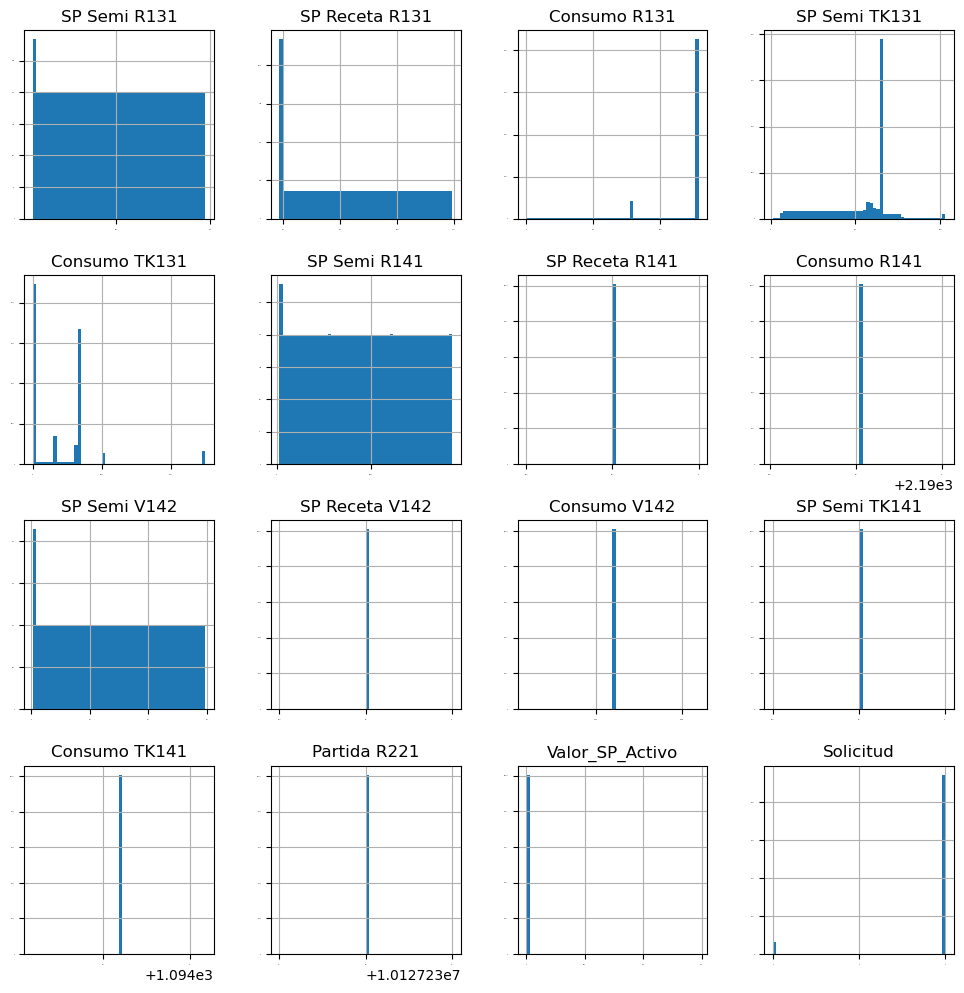

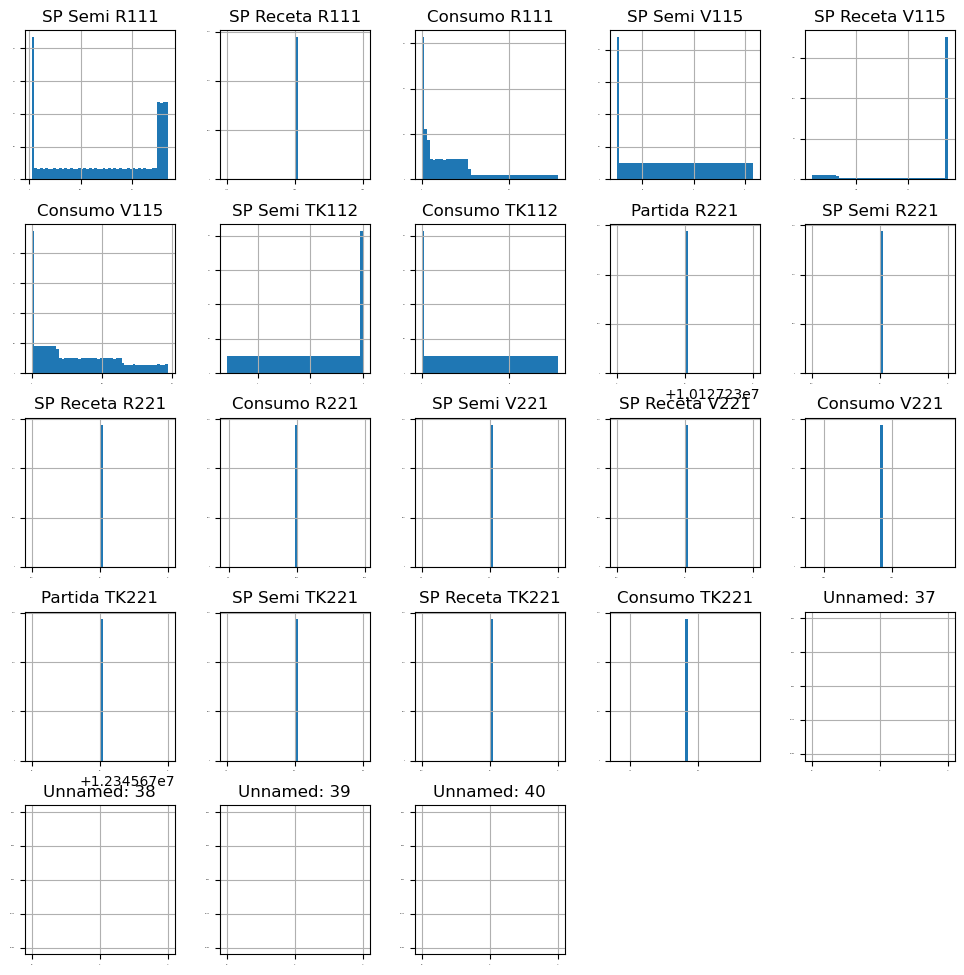

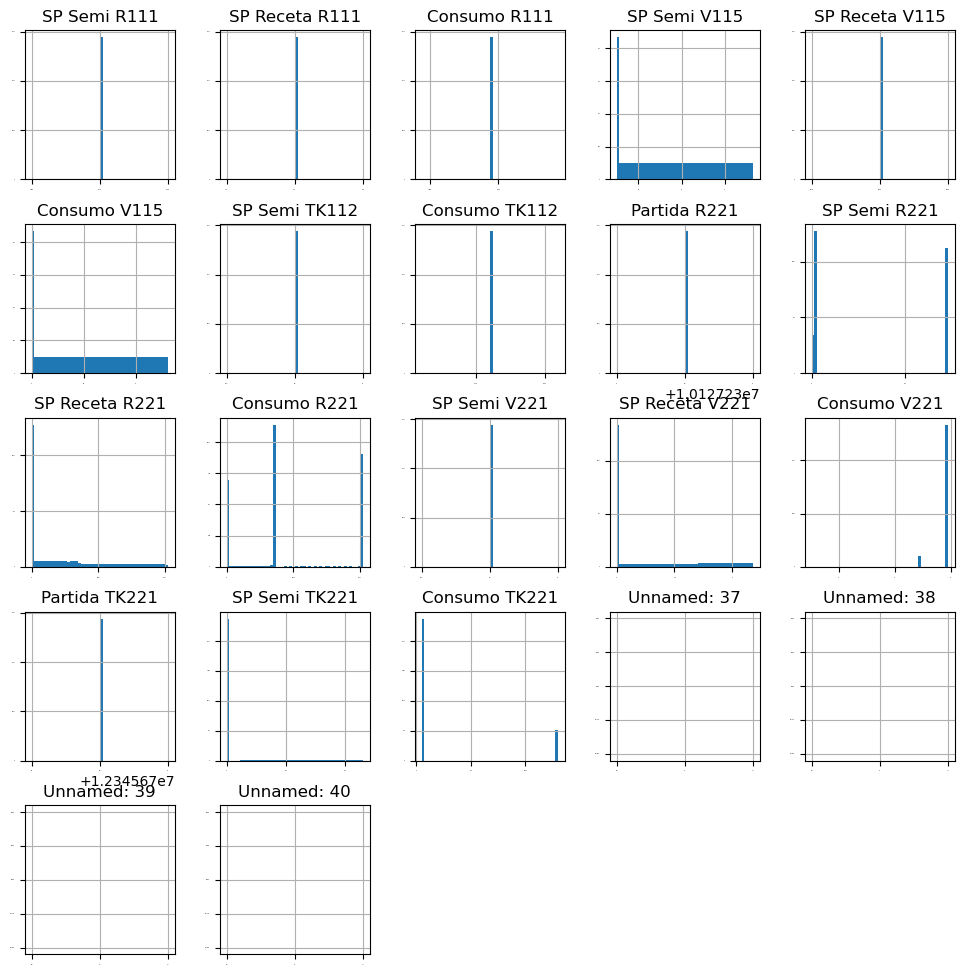

In [ ]:
VisualizacionHis(sample_dfSoda)
VisualizacionHis(sample_dfXilol)
VisualizacionHis(sample_dfToluol)


 Distribución de densidad en la misma escala del eje x.

In [ ]:

def VisualizacionDensity(df):
    df = df.drop(df.filter(regex='^Partida').columns, axis=1)
    df = df.drop(df.filter(regex='^Estado').columns, axis=1)
    df = df.replace('Bad Input', 0)
    df.plot(kind='density', subplots=True, layout=(6,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
    pyplot.show()

C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_8176\2622806762.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Bad Input', 0)


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

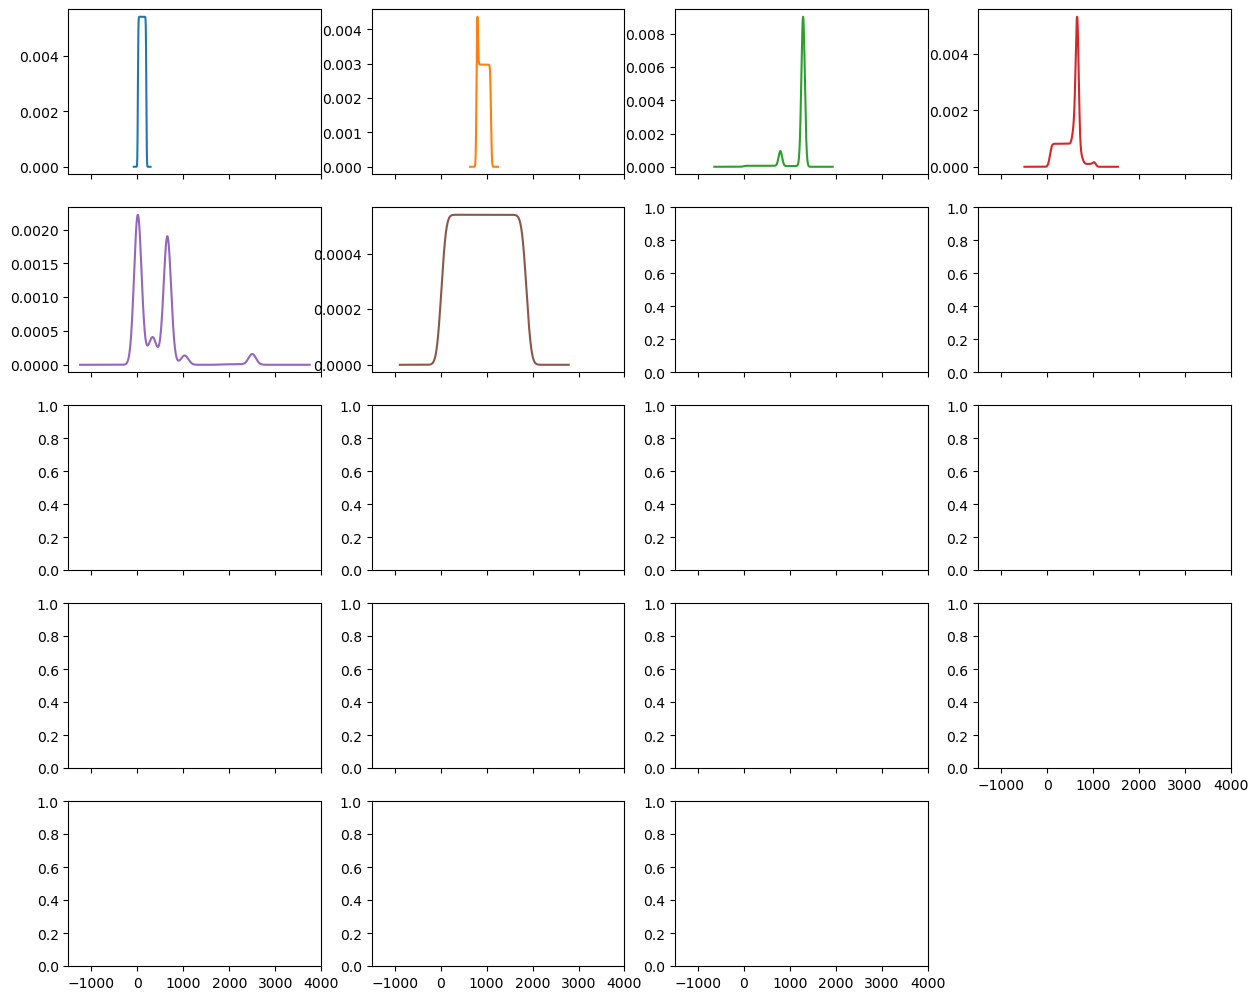

In [ ]:
VisualizacionDensity(sample_dfSoda)

Para tener una idea de la interdependencia de los datos, observamos el diagrama de dispersión y la matriz de correlación.

In [ ]:
def EdaCorr(df,mp):
    df = df.drop(df.filter(regex='^Partida').columns, axis=1)
    df = df.drop(df.filter(regex='^Estado').columns, axis=1)
    df = df.replace('Bad Input', 0)
    df = df.replace('Tag not found', 0)
    correlation = df.corr()
    pyplot.figure(figsize=(15,15))
    pyplot.title('Correlation Matrix'+ mp)
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_8176\1618560902.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Bad Input', 0)
C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_8176\1618560902.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Tag not found', 0)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


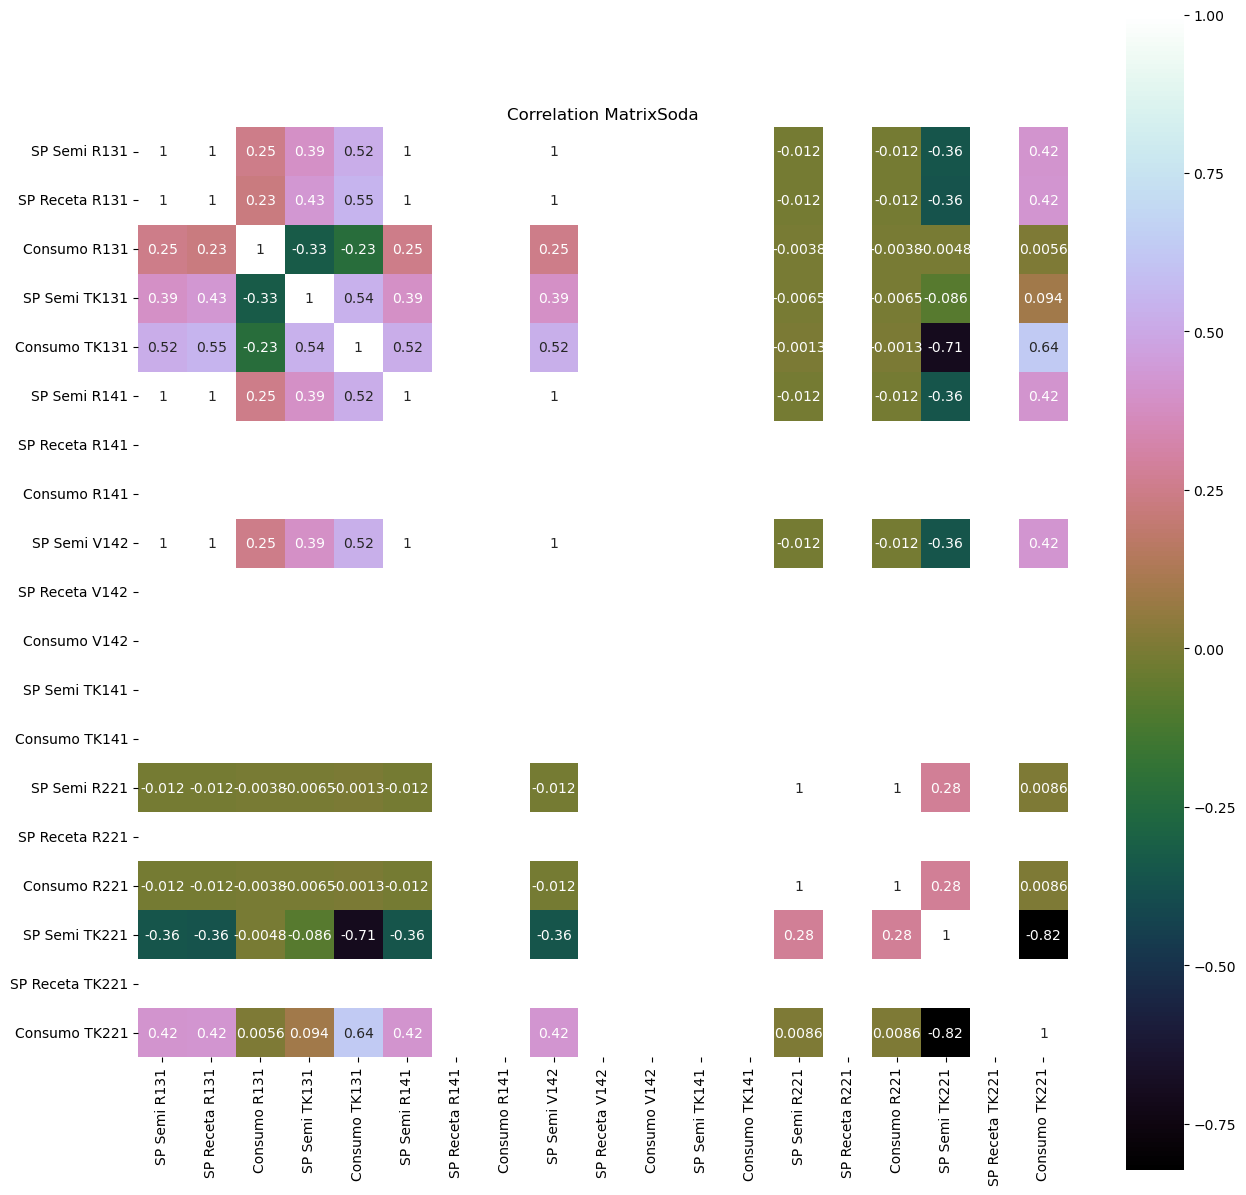

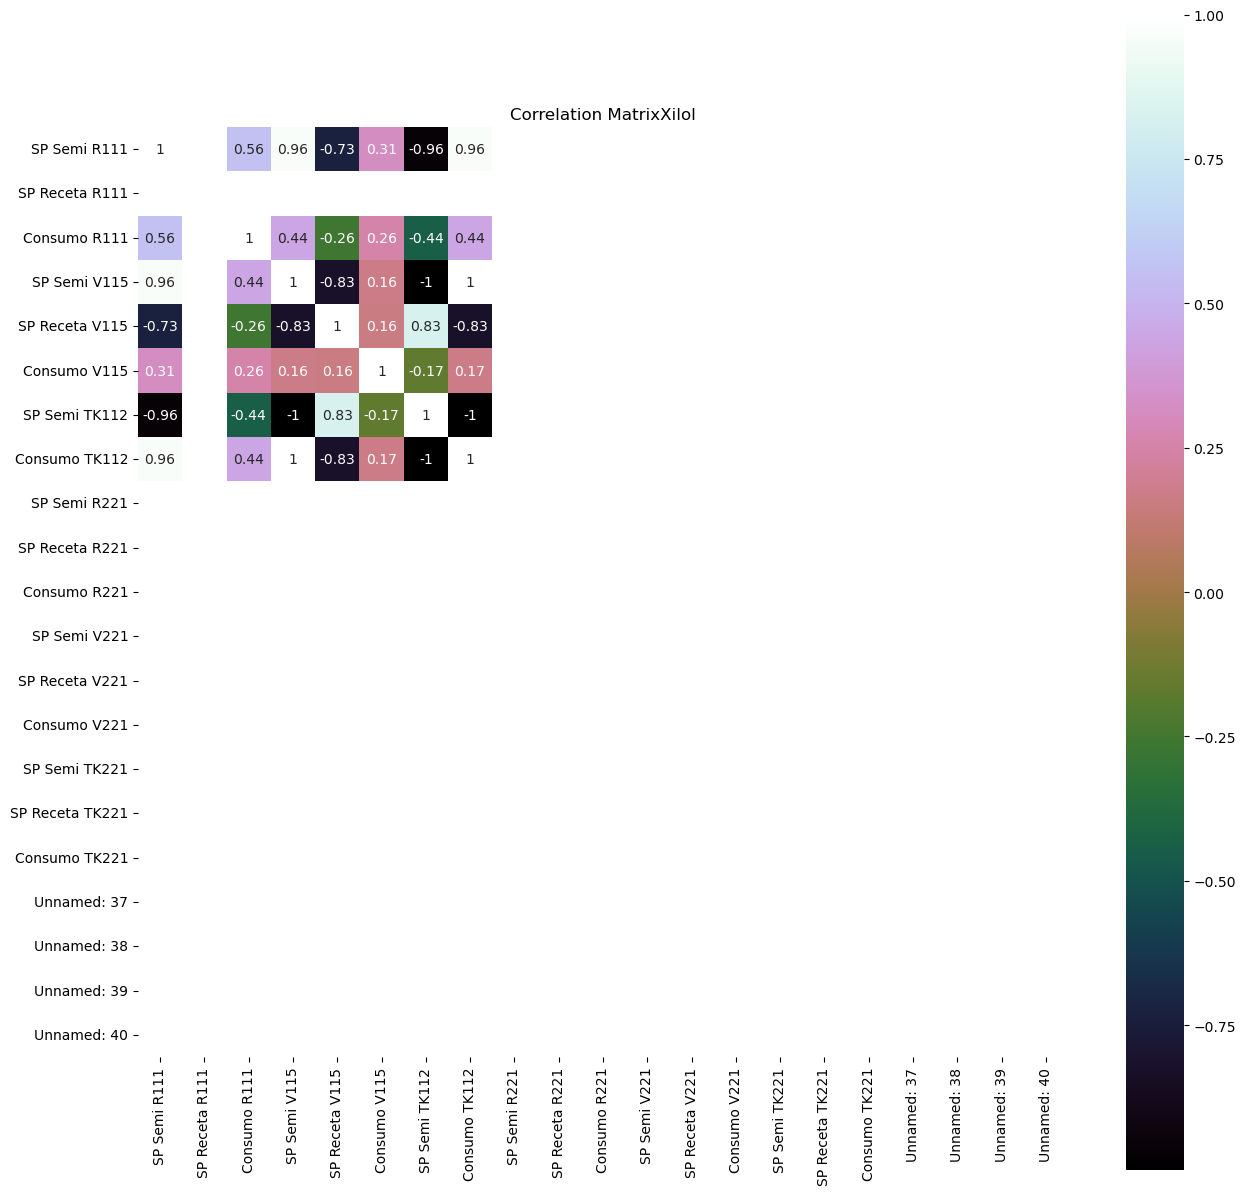

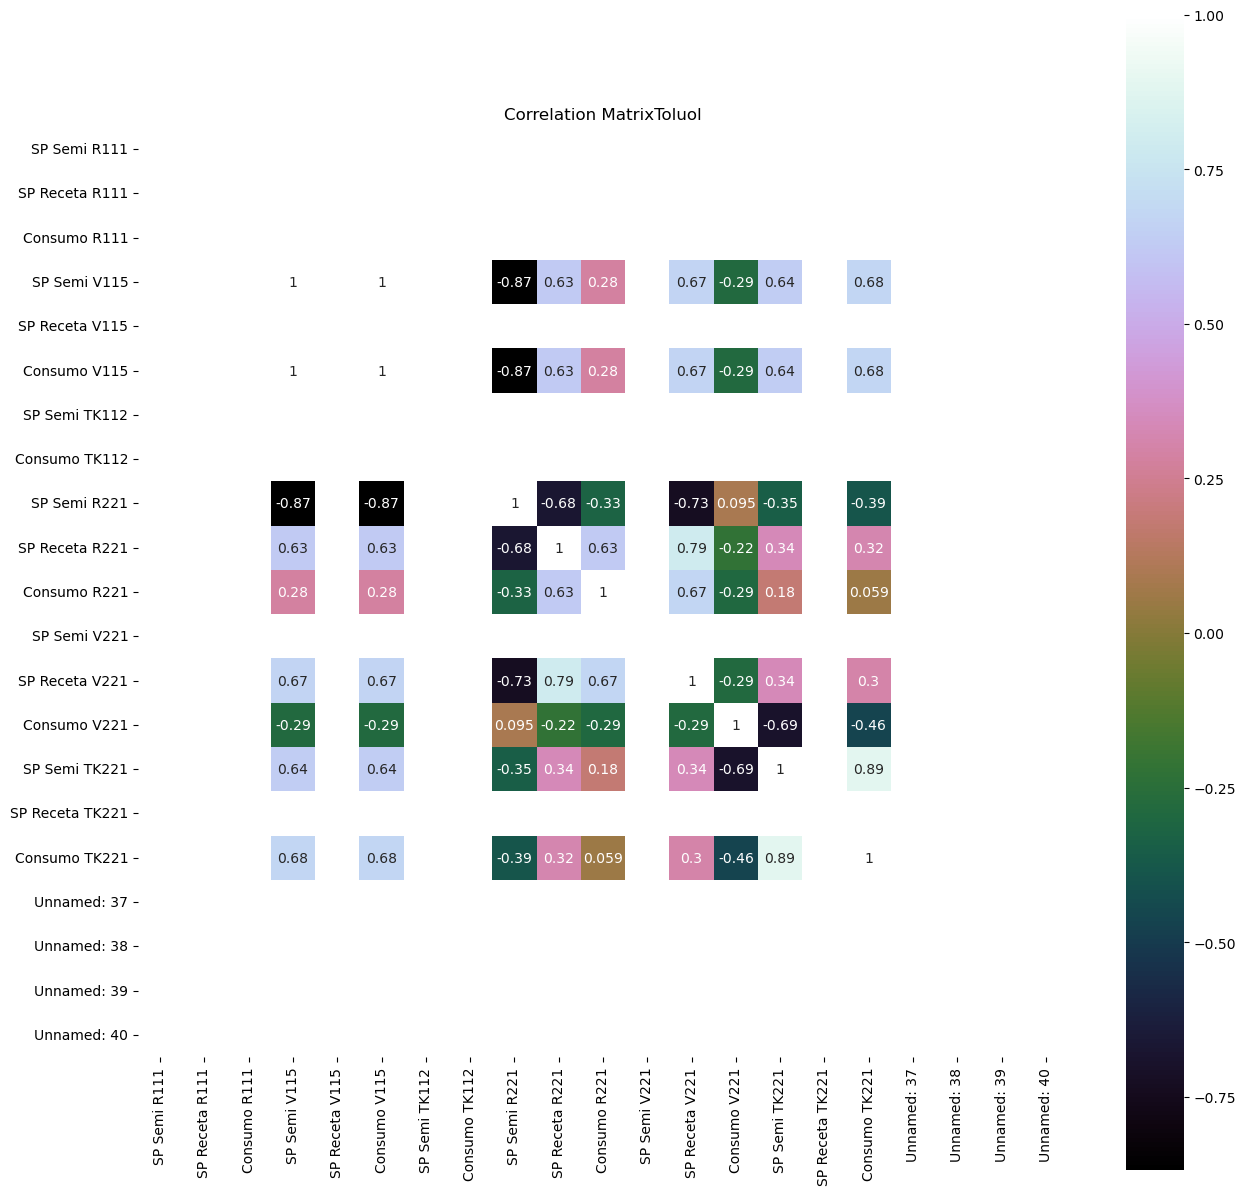

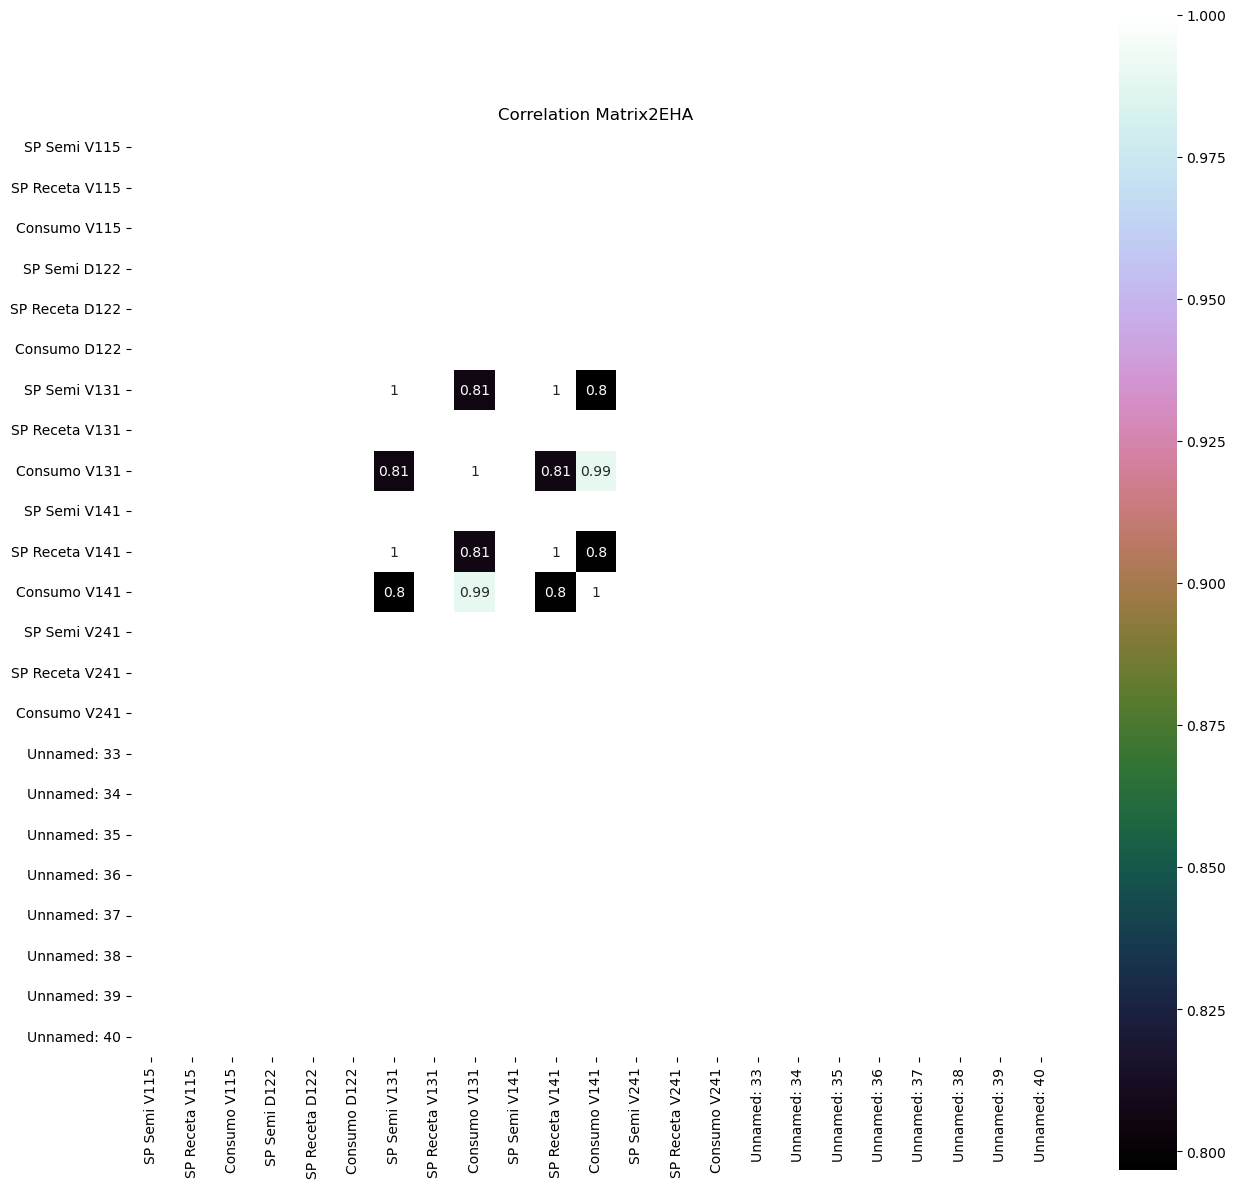

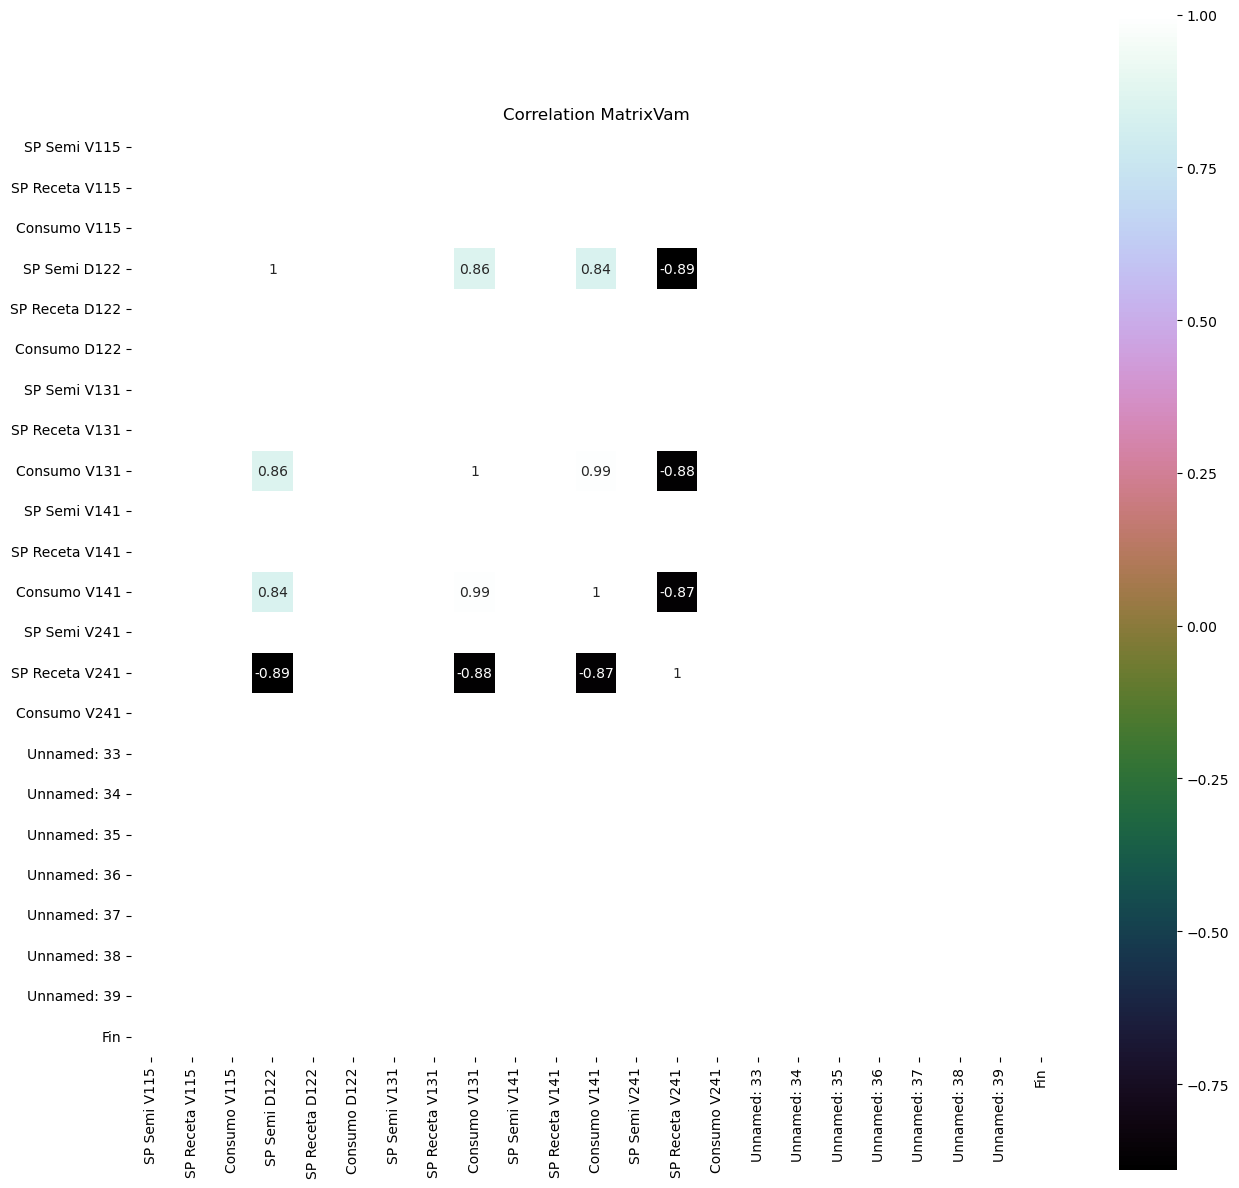

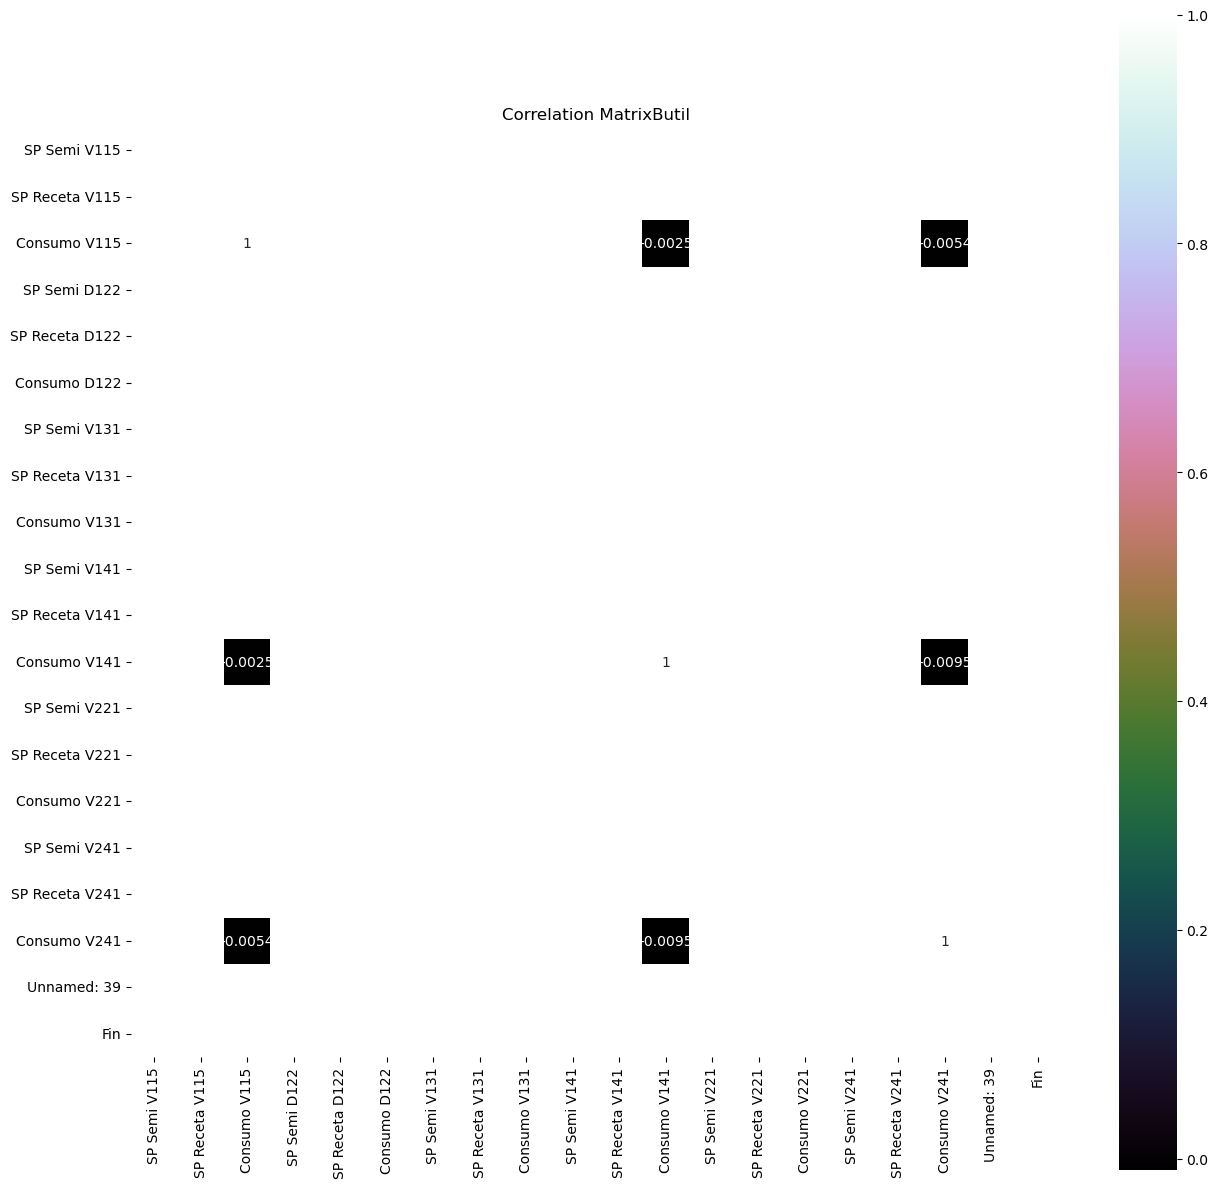

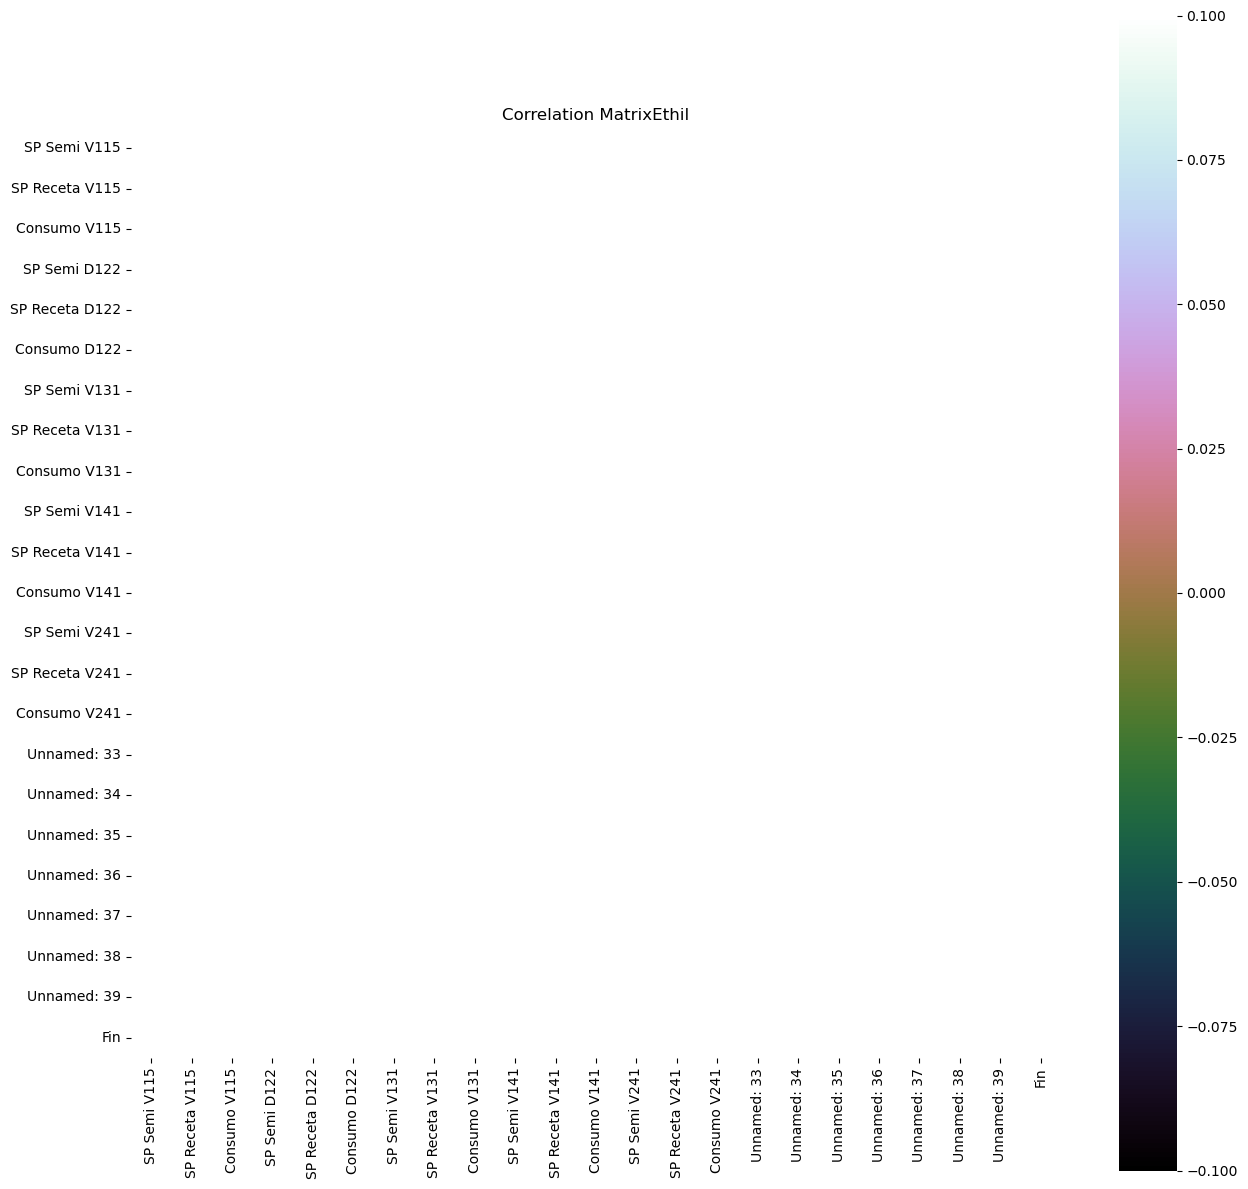

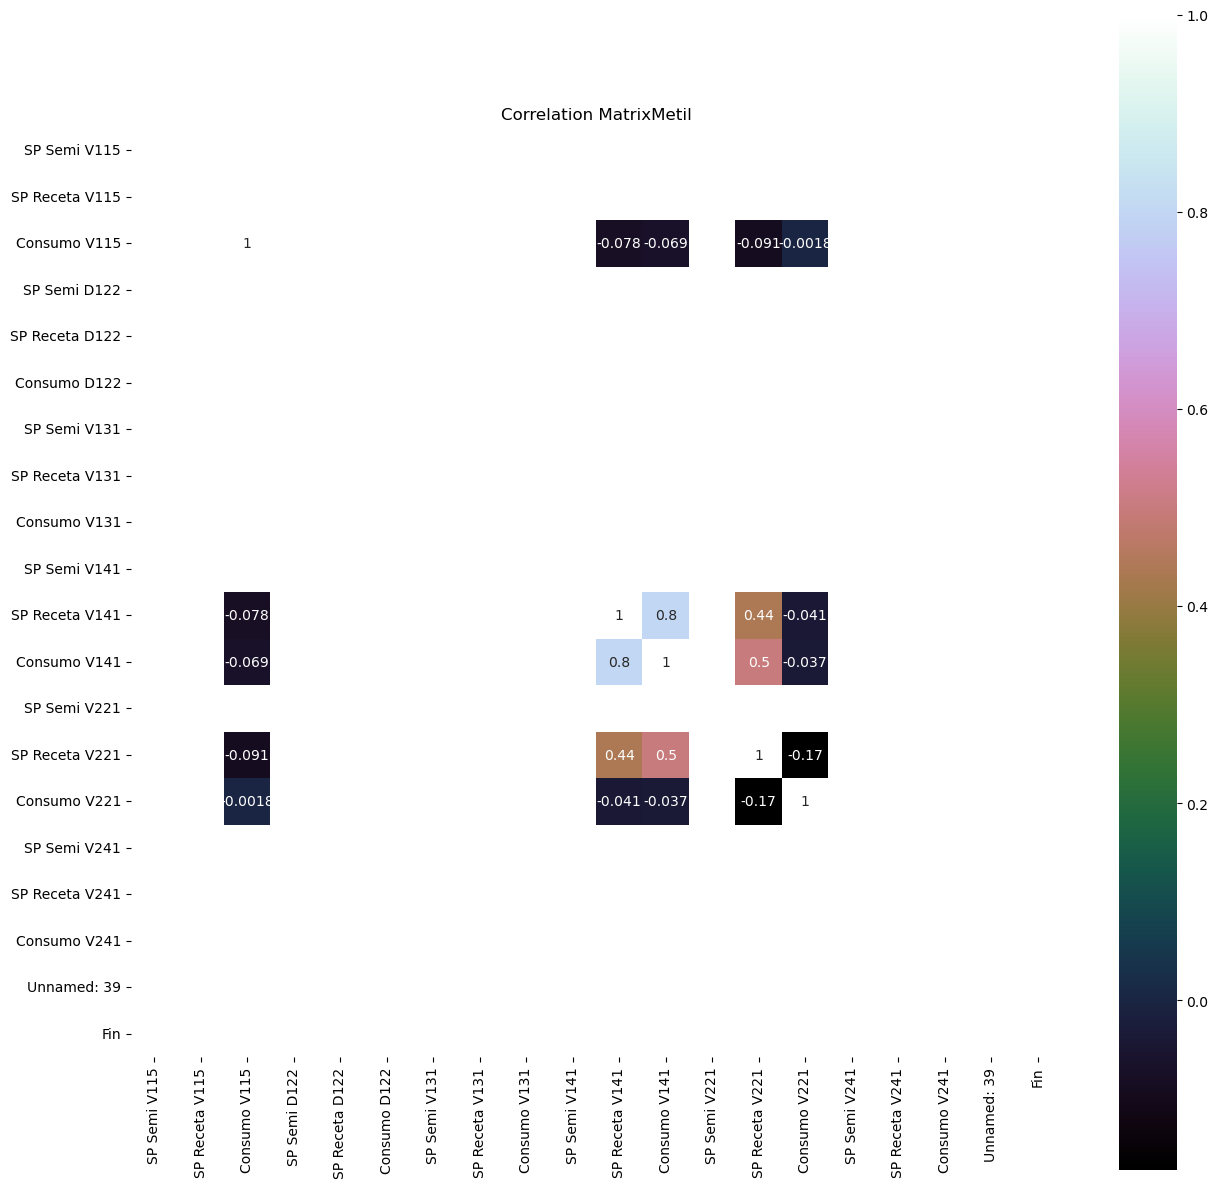

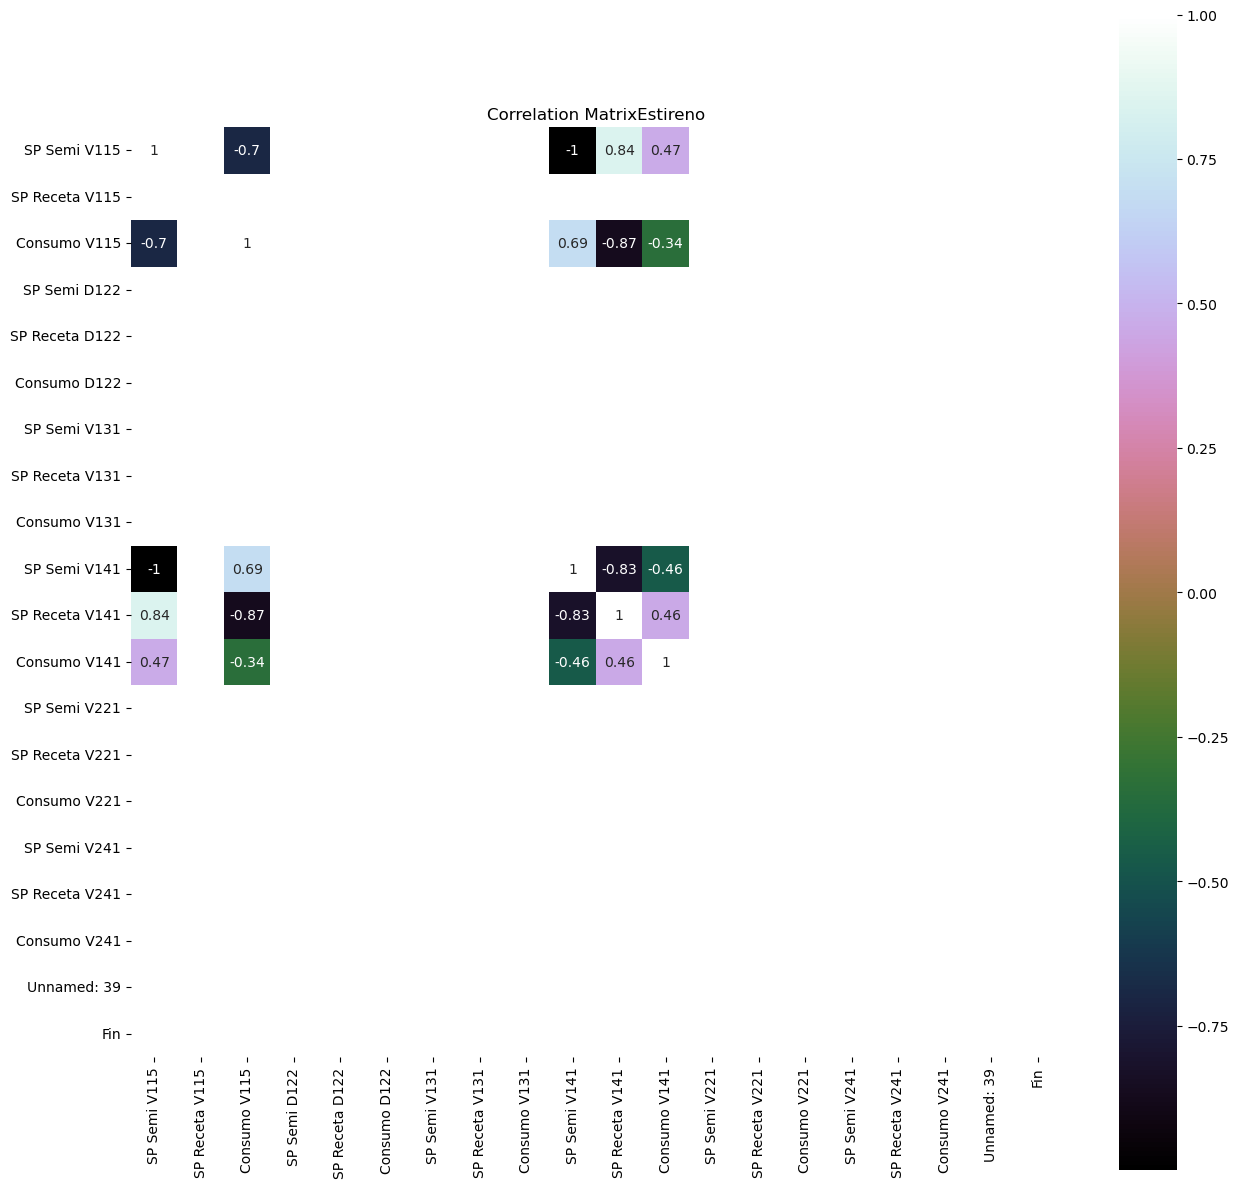

In [ ]:
EdaCorr(sample_dfSoda,"Soda")
EdaCorr(sample_dfXilol,"Xilol")
EdaCorr(sample_dfToluol,"Toluol")
EdaCorr(sample_df2EHA,"2EHA")
EdaCorr(sample_dfVAM,"Vam")
EdaCorr(sample_dfButil,"Butil")
EdaCorr(sample_dfEthil,"Ethil")
EdaCorr(sample_dfMetil,"Metil")
EdaCorr(sample_dfEstireno,"Estireno")

In [ ]:
def MatrixScatter(df):
    df = df.drop(df.filter(regex='^Partida').columns, axis=1)
    df = df.drop(df.filter(regex='^Estado').columns, axis=1)
    df = df.replace('Bad Input', 0)
    df = df.replace('Tag not found', 0)
    pyplot.figure(figsize=(15,15))
    scatter_matrix(df,figsize=(12,12))
    pyplot.show()

C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_8176\2048525473.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Bad Input', 0)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims ma

<Figure size 1500x1500 with 0 Axes>

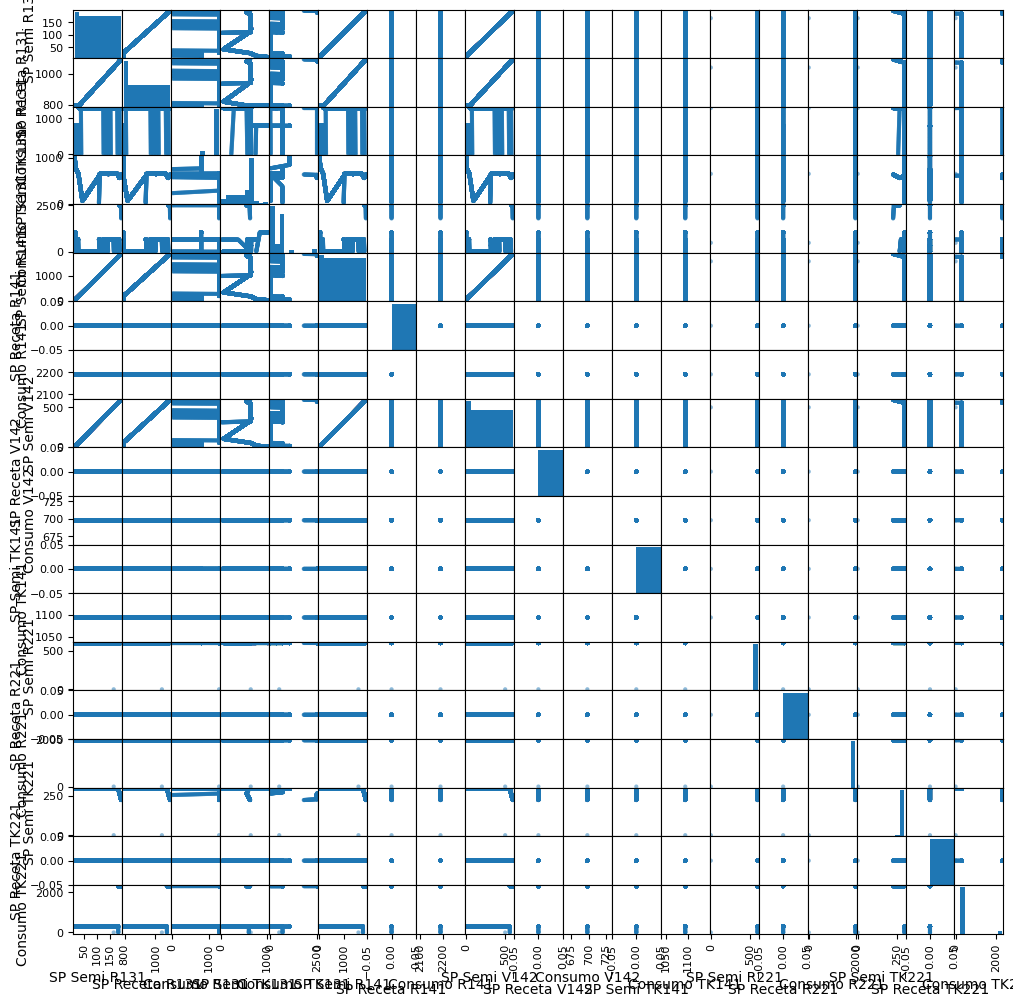

In [ ]:
MatrixScatter(sample_dfSoda)

*3.3 Analisis de la serie de tiempo*

# 4. Preparacion de Datos

In [ ]:
def identificar_sp_activo(row, equipo):
    if 'Activo_Receta' + equipo in row:
        if row['Activo_Receta' + equipo]:
            return 'SP Receta ' + equipo
        elif row['Activo_Semi' + equipo]:
            return 'SP Semi ' + equipo
        else:
            return 'Ninguno'
    elif 'Activo_Semi' + equipo in row:
        if row['Activo_Semi' + equipo]:
            return 'SP Semi ' + equipo
    return 'Ninguno'



# Identificar si el bombeo está activo
def CalculoMP(equipo,sample_df):

    sample_df['Activo_Semi' + equipo] = sample_df['Estado Bombeo Semi '+ equipo] == 'Active'

    if 'Estado Bombeo Receta ' + equipo in sample_df.columns:
        sample_df['Activo_Receta' + equipo] = sample_df['Estado Bombeo Receta '+ equipo] == 'Active'


    # Crear una columna que identifique el nuevo SP activo
    # Aplicar la función para identificar el SP activo en cada momento
    # sample_df['SP_Activo' + equipo] = sample_df.apply(identificar_sp_activo, axis=1)
    sample_df['SP_Activo' + equipo] = sample_df.apply(identificar_sp_activo, axis=1, args=(equipo,))


    # Crear una columna con el valor del SP activo en cada momento
    sample_df['Valor_SP_Activo'] = sample_df.apply(
        lambda row: row['SP Receta ' + equipo] if row['SP_Activo' + equipo] == 'SP Receta ' + equipo
        else (row['SP Semi ' + equipo] if row['SP_Activo' + equipo] == 'SP Semi ' + equipo else 0),
        axis=1
    )

    # Identificar cambios en el SP activo (cada vez que se activa uno nuevo)
    sample_df['Cambio_SP_Activo'] = sample_df['SP_Activo' + equipo].shift(1) != sample_df['SP_Activo' + equipo]
    sample_df['Consumo R131_1'] = sample_df['Consumo ' + equipo].shift(-1)

    # Crear un número de solicitud único para cada nuevo SP activo
    sample_df['Solicitud'] = sample_df['Cambio_SP_Activo'].cumsum()

    # Agrupar los sample_df por solicitud y obtener los valores finales de SP y PV
    resultadoR131 = sample_df[sample_df['SP_Activo' + equipo] != 'Ninguno'].groupby('Solicitud').agg(
        SP_Activo_Final=('SP_Activo' + equipo, 'last'),
        Valor_SP_Final=('Valor_SP_Activo', 'max'),  # Tomar el máximo de los valores de SP para cada carga
        PV_Final=('Consumo R131_1', 'last')  # Tomar el último PV del grupo
    ).reset_index()
    resultadoR131["Equipo"]=equipo
    return resultadoR131
    # # Sumar todos los valores para cada carga y agregar un total
    # suma_filas = resultadoR131[['Valor_SP_Final', 'PV_Final']].sum().to_frame().T
    # suma_filas['SP_Activo_Final'] = 'Total ' + equipo
    # suma_filas['Solicitud'] = ' '

    # # Concatenar la fila de suma al DataFrame original
    # resultadoSoda_con_sumaR131Soda = pd.concat([resultadoSodaR131, suma_filas], ignore_index=True)
    # # resultadoSoda_con_sumaR131Soda=resultadoSoda

    # # Ordenar el resultadoSoda final para que sea más legible
    # resultado_con_sumaR131Soda = resultadoSod_con_sumaR131Soda[['Solicitud', 'SP_Activo_Final', 'Valor_SP_Final', 'PV_Final']]
    # resultado_con_sumaR131Soda["Equipo"]="R131"
    # # Verificar el resultado
    # return resultado_con_sumaR131Soda


4.1 Materia Prima Soda

In [ ]:
resultadoSodaR131=CalculoMP("R131",sample_dfSoda)
resultadoSodaTK131=CalculoMP("TK131",sample_dfSoda)
resultadoSodaR141=CalculoMP("TK141",sample_dfSoda)
resultadoSodaV142=CalculoMP("V142",sample_dfSoda)
resultadoSodaTk141=CalculoMP("TK141",sample_dfSoda)
resultadoSodaR221=CalculoMP("R221",sample_dfSoda)
resultadoSodaTK221=CalculoMP("TK221",sample_dfSoda)

resultadoSoda=pd.concat([resultadoSodaR131,
                      resultadoSodaTK131,
                      resultadoSodaR141,
                      resultadoSodaV142,
                      resultadoSodaTk141,
                      resultadoSodaR221,
                      resultadoSodaTK221])
resultadoSoda["PV_Final"]=pd.to_numeric(resultadoSoda["PV_Final"])
resultadoSoda["Solicitud"]=resultadoSoda["Solicitud"].astype('category')
resultadoSoda

,Solicitud,SP_Activo_Final,Valor_SP_Final,PV_Final,Equipo
0,2,SP Receta R131,1086.929810,1287.476318,R131
1,4,SP Receta R131,1070.750610,1287.889404,R131
2,6,SP Receta R131,1022.079712,1287.872681,R131
3,8,SP Receta R131,1005.200073,1287.883179,R131
4,10,SP Receta R131,988.587219,1287.870483,R131
5,12,SP Receta R131,970.806824,1287.890991,R131
6,14,SP Receta R131,810.816711,1287.893677,R131
7,16,SP Receta R131,793.000000,793.015930,R131
8,18,SP Receta R131,793.000000,793.013672,R131
0,1,SP Semi TK131,638.449890,2500.017334,TK131


In [ ]:
pivot_tableSoda = resultadoSoda.pivot_table(values=['Valor_SP_Final', 'PV_Final'], index=['Equipo','Solicitud','SP_Activo_Final'], aggfunc='sum', margins=True, margins_name='Total')
pivot_tableSoda["Diferencia"]=pivot_tableSoda["Valor_SP_Final"]-pivot_tableSoda["PV_Final"]
pivot_tableSoda

C:\Users\JeissonVelasquez\AppData\Local\Temp\ipykernel_8176\3376301475.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tableSoda = resultadoSoda.pivot_table(values=['Valor_SP_Final', 'PV_Final'], index=['Equipo','Solicitud','SP_Activo_Final'], aggfunc='sum', margins=True, margins_name='Total')


PV_Final  Valor_SP_Final   Diferencia
Equipo Solicitud SP_Activo_Final                                           
R131   1         SP Receta R131       0.000000        0.000000     0.000000
                 SP Semi TK131        0.000000        0.000000     0.000000
                 SP Semi TK221        0.000000        0.000000     0.000000
       2         SP Receta R131    1287.476318     1086.929810  -200.546509
                 SP Semi TK131        0.000000        0.000000     0.000000
...                                        ...             ...          ...
TK221  21        SP Semi TK221        0.000000        0.000000     0.000000
       23        SP Receta R131       0.000000        0.000000     0.000000
                 SP Semi TK131        0.000000        0.000000     0.000000
                 SP Semi TK221        0.000000        0.000000     0.000000
Total                             19981.683176    16744.525696 -3237.157480

[190 rows x 3 columns]

4.2 Materia Prima Xilol

In [ ]:
resultadoXilolR111=CalculoMP("R111",sample_dfXilol)
resultadoXilolV115=CalculoMP("V115",sample_dfXilol)
resultadoXilolTK112=CalculoMP("TK112",sample_dfXilol)
resultadoXilolR221=CalculoMP("R221",sample_dfXilol)
resultadoXilolV221=CalculoMP("V221",sample_dfXilol)
resultadoXilolTK221=CalculoMP("TK221",sample_dfXilol)


resultadoXilol=pd.concat([resultadoXilolR111,
                resultadoXilolV115,
                resultadoXilolTK112,
                resultadoXilolR221,
                resultadoXilolV221,
                resultadoXilolTK221
                ])
resultadoXilol["PV_Final"]=pd.to_numeric(resultadoXilol["PV_Final"])
resultadoXilol["Solicitud"]=resultadoXilol["Solicitud"].astype('category')
resultadoXilol

4.3 Materia Prima Touluol

In [ ]:
resultadoToluolR111=CalculoMP("R111",sample_dfToluol)
resultadoToluolV115=CalculoMP("V115",sample_dfToluol)
resultadoToluolTK112=CalculoMP("TK112",sample_dfToluol)
resultadoToluolR221=CalculoMP("R221",sample_dfToluol)
resultadoToluolV221=CalculoMP("V221",sample_dfToluol)
resultadoToluolTK221=CalculoMP("TK221",sample_dfToluol)


resultadoToluol=pd.concat([resultadoToluolR111,
                resultadoToluolV115,
                resultadoToluolTK112,
                resultadoToluolR221,
                resultadoToluolV221,
                resultadoToluolTK221
                ])
resultadoToluol["PV_Final"]=pd.to_numeric(resultadoToluol["PV_Final"])
resultadoToluol["Solicitud"]=resultadoToluol["Solicitud"].astype('category')
resultadoToluol

4.4 Materia Prima 2EHA

In [ ]:
resultado2EHAV115=CalculoMP("V115",sample_df2EHA)
resultado2EHAD122=CalculoMP("D122",sample_df2EHA)
resultado2EHAV131=CalculoMP("V131",sample_df2EHA)
resultado2EHAV141=CalculoMP("V141",sample_df2EHA)
resultado2EHAV241=CalculoMP("V241",sample_df2EHA)


resultado2EHA=pd.concat([
                resultado2EHAV115,
                resultado2EHAD122,
                resultado2EHAV131,
                resultado2EHAV141,
                resultado2EHAV241
                ])
resultado2EHA["PV_Final"]=pd.to_numeric(resultado2EHA["PV_Final"])
resultado2EHA["Solicitud"]=resultado2EHA["Solicitud"].astype('category')
resultado2EHA

4.5 Materia Prima VAM

In [ ]:
resultadoVamV115=CalculoMP("V115",sample_dfVAM)
resultadoVamD122=CalculoMP("D122",sample_dfVAM)
resultadoVamV131=CalculoMP("V131",sample_dfVAM)
resultadoVamV141=CalculoMP("V141",sample_dfVAM)
resultadoVamV241=CalculoMP("V241",sample_dfVAM)


resultadoVam=pd.concat([
                resultadoVamV115,
                resultadoVamD122,
                resultadoVamV131,
                resultadoVamV141,
                resultadoVamV241
                ])
resultadoVam["PV_Final"]=pd.to_numeric(resultadoVam["PV_Final"])
resultadoVam["Solicitud"]=resultadoVam["Solicitud"].astype('category')
resultadoVam

4.6 Materia Prima Butil

In [ ]:
resultadoButilV115=CalculoMP("V115",sample_dfButil)
resultadoButilD122=CalculoMP("D122",sample_dfButil)
resultadoButilV131=CalculoMP("V131",sample_dfButil)
resultadoButilV141=CalculoMP("V141",sample_dfButil)
resultadoButilV241=CalculoMP("V241",sample_dfButil)
resultadoButilV221=CalculoMP("V221",sample_dfButil)


resultadoButil=pd.concat([
                resultadoButilV115,
                resultadoButilD122,
                resultadoButilV131,
                resultadoButilV141,
                resultadoButilV241,
                resultadoButilV221
                ])
resultadoButil["PV_Final"]=pd.to_numeric(resultadoButil["PV_Final"])
resultadoButil["Solicitud"]=resultadoButil["Solicitud"].astype('category')
resultadoButil

4.7 Materia Prima Ethil

In [ ]:
resultadoEthilV115=CalculoMP("V115",sample_dfEthil)
resultadoEthilD122=CalculoMP("D122",sample_dfEthil)
resultadoEthilV131=CalculoMP("V131",sample_dfEthil)
resultadoEthilV141=CalculoMP("V141",sample_dfEthil)
resultadoEthilV241=CalculoMP("V241",sample_dfEthil)


resultadoEthil=pd.concat([
                resultadoEthilV115,
                resultadoEthilD122,
                resultadoEthilV131,
                resultadoEthilV141,
                resultadoEthilV241
                ])
resultadoEthil["PV_Final"]=pd.to_numeric(resultadoEthil["PV_Final"])
resultadoEthil["Solicitud"]=resultadoEthil["Solicitud"].astype('category')
resultadoEthil

4.8 Materia Prima Metil

In [ ]:

resultadoMetilV115=CalculoMP("V115",sample_dfMetil)
resultadoMetilD122=CalculoMP("D122",sample_dfMetil)
resultadoMetilV131=CalculoMP("V131",sample_dfMetil)
resultadoMetilV141=CalculoMP("V141",sample_dfMetil)
resultadoMetilV241=CalculoMP("V241",sample_dfMetil)
resultadoMetilV221=CalculoMP("V221",sample_dfMetil)


resultadoMetil=pd.concat([
                resultadoMetilV115,
                resultadoMetilD122,
                resultadoMetilV131,
                resultadoMetilV141,
                resultadoMetilV241,
                resultadoMetilV221
                ])
resultadoMetil["PV_Final"]=pd.to_numeric(resultadoMetil["PV_Final"])
resultadoMetil["Solicitud"]=resultadoMetil["Solicitud"].astype('category')
resultadoMetil

4.9 Materia Prima Estireno

In [ ]:
resultadoEstirenoV115=CalculoMP("V115",sample_dfEstireno)
resultadoEstirenoD122=CalculoMP("D122",sample_dfEstireno)
resultadoEstirenoV131=CalculoMP("V131",sample_dfEstireno)
resultadoEstirenoV141=CalculoMP("V141",sample_dfEstireno)
resultadoEstirenoV241=CalculoMP("V241",sample_dfEstireno)
resultadoEstirenoV221=CalculoMP("V221",sample_dfEstireno)


resultadoEstireno=pd.concat([
                resultadoEstirenoV115,
                resultadoEstirenoD122,
                resultadoEstirenoV131,
                resultadoEstirenoV141,
                resultadoEstirenoV241,
                resultadoEstirenoV221
                ])
resultadoEstireno["PV_Final"]=pd.to_numeric(resultadoEstireno["PV_Final"])
resultadoEstireno["Solicitud"]=resultadoEstireno["Solicitud"].astype('category')
resultadoEstireno